# **Linear Regression model on climate change and its impact on Agriculture**

In this notebook, I'm going to demonstrate the process of building and optimizing a linear regression model on the use case of agriculture and the impacts climate change has to it, which would be used to make data-driven recommendations to farmers, leading to better productivity and potentially creating more job opportunities in agriculture. I will explore different linear regression models using gradient descent to make predictions based on real-world data.

## **1. Dataset loading and Preparation**

In [2]:
# Importing necessary packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Mounting the dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [4]:
file_path = "predictions/Agriculture dataset/climate_change_impact_on_agriculture_2024.csv"
dataset = pd.read_csv(file_path)
# drop any row with missing data and any duplicate row
dataset = dataset.dropna()
dataset = dataset.drop_duplicates()
dataset.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


## **2. Linear regression model using gradient descent** ##


In [5]:
#independent variable
y = dataset['Crop_Yield_MT_per_HA']

#dependent variables
X = dataset[['Fertilizer_Use_KG_per_HA', 'Average_Temperature_C', 'Soil_Health_Index', 'Irrigation_Access_%']]

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(X_train)

#Standardizing and scaling X
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


# Scale the target variable
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

# Initializing the model
model = LinearRegression()
#Training the model
model.fit(X_train_poly, y_train_scaled)

# Make predictions
y_pred_scaled = model.predict(X_test_poly)

# Evaluate the model
y_pred = y_scaler.inverse_transform(y_pred_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.9064255602064883


**Decision trees**

In [8]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_poly, y_train)
y_pred_tree = dt_model.predict(X_test_poly)

mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f"Decision Tree MSE: {mse_tree}")

Decision Tree MSE: 1.459269057


**Random Forest**

In [9]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_poly, y_train)
rf_pred = rf_model.predict(X_test_poly)

rf_mse = mean_squared_error(y_test, rf_pred)
print(f"Random Forest MSE: {rf_mse}")

Random Forest MSE: 0.78335217833955


**Interpreting Results**

In [10]:
import joblib

# Save the model
joblib.dump(rf_model, "random_forest_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(poly, "poly.pkl")

# Load the model later
loaded_model = joblib.load("random_forest_model.pkl")

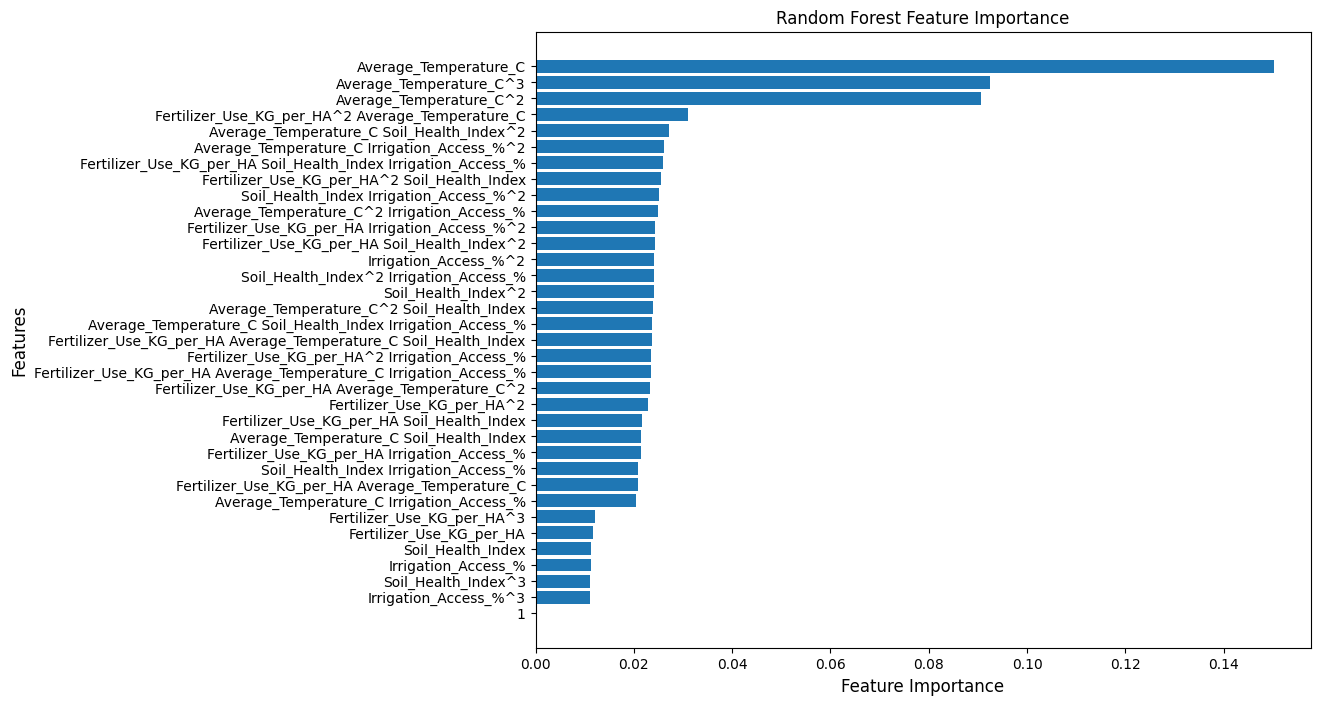

In [11]:
# Extract feature names from the PolynomialFeatures transformation
original_features = ['Fertilizer_Use_KG_per_HA', 'Average_Temperature_C', 'Soil_Health_Index', 'Irrigation_Access_%']
feature_names = poly.get_feature_names_out(original_features)

# Get the feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Sort the feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot of the feature importance
plt.figure(figsize=(10, 8))
plt.barh(np.array(feature_names)[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()

**Script for making predictions**

In [ ]:
import numpy as np
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


# Load the scaler and PolynomialFeatures objects
scaler = joblib.load("scaler.pkl")
poly = joblib.load("poly.pkl")

# Define a function to make predictions
def make_prediction(input_data):
    """
    Predicts crop yield based on the input data.
    """
    # Ensure input data is a pandas DataFrame with the correct column names
    feature_names = ['Fertilizer_Use_KG_per_HA', 'Average_Temperature_C',
                     'Soil_Health_Index', 'Irrigation_Access_%']
    input_df = pd.DataFrame(input_data, columns=feature_names)

    # Transform the input data using the loaded scaler and polynomial transformer
    input_scaled = scaler.transform(input_df)
    input_poly = poly.transform(input_scaled)

    # Make a prediction
    prediction = loaded_model.predict(input_poly)
    return prediction

# # Example
# new_data = [[60, 27, 75, 65]]
# predicted_yield = make_prediction(new_data)
# print(f"Predicted Crop Yield: {predicted_yield[0]:.2f} MT/HA")


Predicted Crop Yield: 2.37 MT/HA
